<a href="https://colab.research.google.com/github/StuffbyYuki/Students-Performance-in-Exams/blob/master/Exploratory_Data_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <b>Exploratory Data Analysis</b>
##### • EDA is an approach to analyzing data sets to summarize their main characteristics, often with visual methods. A statistical model can be used or not, but primarily EDA is for seeing what the data can tell us beyond the formal modeling or hypothesis testing task. <a href='https://en.wikipedia.org/wiki/Exploratory_data_analysis'>Wikipedia</a>

##### • We will use "Student Performance in Exams" dataset from Kaggle. <a href='https://www.kaggle.com/spscientist/students-performance-in-exams'>Data source </a>

<br>

#### <b>The main purposes for this analysis is to:</b>
##### <i>1. To better understand and get familiar with the data.</i>
##### <i>2. To indentify and clean any defeacts in the data such as missing values and outliers.</i>
##### <i>3. To indentify any patterns, trends, and interesting facts that lie within the data.</i>
- what variables contribute to students' test scores?
- Is the test prep course effective?
- etc


## <b>Firtst glance at the data</b>

In [0]:
#Import libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [0]:
#Get the data and look at the first 5 rows
df = pd.read_csv('/content/drive/My Drive/Datasets/StudentsPerformance.csv')
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [0]:
#Get the shape of data
print(f'Shape of data: {df.shape}')
print(f'Number of rows: {df.shape[0]}')
print(f'Number of columns: {df.shape[1]}')
print(f'Number of dimensions: {df.ndim}')

Shape of data: (1000, 8)
Number of rows: 1000
Number of columns: 8
Number of dimensions: 2


In [0]:
#column names
print(f'Column names are: {df.columns}')

Column names are: Index(['gender', 'race/ethnicity', 'parental level of education', 'lunch',
       'test preparation course', 'math score', 'reading score',
       'writing score'],
      dtype='object')


<b>• Some columns include space or '/', which I don't prefer to have in column names. So I'll replace that with '_'.</b>

In [0]:
#replace ' ' and '/' with '_'
df.columns = df.columns.str.replace(' ', '_').str.replace('/', '_')
df.columns

Index(['gender', 'race_ethnicity', 'parental_level_of_education', 'lunch',
       'test_preparation_course', 'math_score', 'reading_score',
       'writing_score'],
      dtype='object')

## <b>Types of Data</b>

In [0]:
#Look at dtypes
print(df.dtypes)
print('\n')
print(df.dtypes.value_counts())

gender                         object
race_ethnicity                 object
parental_level_of_education    object
lunch                          object
test_preparation_course        object
math_score                      int64
reading_score                   int64
writing_score                   int64
dtype: object


object    5
int64     3
dtype: int64


In [0]:
#only show numerical dtypes
print(df.select_dtypes(include='number').head())

print('\n')

#only show non-numerical dtypes
print(df.select_dtypes(include='object').head())

   math_score  reading_score  writing_score
0          72             72             74
1          69             90             88
2          90             95             93
3          47             57             44
4          76             78             75


   gender race_ethnicity  ...         lunch test_preparation_course
0  female        group B  ...      standard                    none
1  female        group C  ...      standard               completed
2  female        group B  ...      standard                    none
3    male        group A  ...  free/reduced                    none
4    male        group C  ...      standard                    none

[5 rows x 5 columns]


In [0]:
#Look at the dtypes, missing values as well as memory usage at the same time.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race_ethnicity               1000 non-null   object
 2   parental_level_of_education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test_preparation_course      1000 non-null   object
 5   math_score                   1000 non-null   int64 
 6   reading_score                1000 non-null   int64 
 7   writing_score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


<b>- Some dtype of object can probably be converted to dtype of category for it's more efficient in terms of memory usage.</b>

<b>- It looks like there is no missing values, but we want to make sure that's true.</b>

## <b>Memory Usage</b>

<b>• As we looked at the dtypes, there were only 'object' and 'int64'.</b>
<br>
<b>• We will inspect if we really need them to be 'object'/'int64'.</b>

In [0]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race_ethnicity               1000 non-null   object
 2   parental_level_of_education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test_preparation_course      1000 non-null   object
 5   math_score                   1000 non-null   int64 
 6   reading_score                1000 non-null   int64 
 7   writing_score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [0]:
#See memory usage for each column
df.memory_usage(deep=True)

Index                            128
gender                         62036
race_ethnicity                 64000
parental_level_of_education    71619
lunch                          66420
test_preparation_course        62790
math_score                      8000
reading_score                   8000
writing_score                   8000
dtype: int64

<b>- Obviously, dtype of 'object' takes up a lot of memory. We may convert it to 'category' if it doesn't contain a lot of value_counts. </b>

### • Let's first look at non-numerical values.

In [0]:
#Let's look at the value counts for each.
for col in df.select_dtypes(include='object').columns:
  print(f'---Value counts for {col}---\n {df[col].value_counts()}. \n\n')

---Value counts for gender---
 female    518
male      482
Name: gender, dtype: int64. 


---Value counts for race_ethnicity---
 group C    319
group D    262
group B    190
group E    140
group A     89
Name: race_ethnicity, dtype: int64. 


---Value counts for parental_level_of_education---
 some college          226
associate's degree    222
high school           196
some high school      179
bachelor's degree     118
master's degree        59
Name: parental_level_of_education, dtype: int64. 


---Value counts for lunch---
 standard        645
free/reduced    355
Name: lunch, dtype: int64. 


---Value counts for test_preparation_course---
 none         642
completed    358
Name: test_preparation_course, dtype: int64. 




In [0]:
#You can simple do the same by calling this
df.select_dtypes(include='object').nunique()

gender                         2
race_ethnicity                 5
parental_level_of_education    6
lunch                          2
test_preparation_course        2
dtype: int64

<b>- Looks like these are more of categorical dtype than simply object (string) dtype, with a hand full of unique values for each. </b><br>
<b>- So we'll change dtype to category so that memory usage'd be more efficient.</b>

In [0]:
#check current memory usage
df.select_dtypes(include='object').memory_usage(deep=True)

Index                            128
gender                         62036
race_ethnicity                 64000
parental_level_of_education    71619
lunch                          66420
test_preparation_course        62790
dtype: int64

In [0]:
#look at how efficient it'd be when converted to category dtype
df.select_dtypes(include='object').astype('category').memory_usage(deep=True)

Index                           128
gender                         1204
race_ethnicity                 1480
parental_level_of_education    1591
lunch                          1214
test_preparation_course        1207
dtype: int64

In [0]:
#covert object to categorical
non_numerical_columns = df.select_dtypes(include='object').columns
for col in non_numerical_columns:
  df[col] = df[col].astype('category')
print(df.select_dtypes(include='category').info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 5 columns):
 #   Column                       Non-Null Count  Dtype   
---  ------                       --------------  -----   
 0   gender                       1000 non-null   category
 1   race_ethnicity               1000 non-null   category
 2   parental_level_of_education  1000 non-null   category
 3   lunch                        1000 non-null   category
 4   test_preparation_course      1000 non-null   category
dtypes: category(5)
memory usage: 5.7 KB
None


In [0]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype   
---  ------                       --------------  -----   
 0   gender                       1000 non-null   category
 1   race_ethnicity               1000 non-null   category
 2   parental_level_of_education  1000 non-null   category
 3   lunch                        1000 non-null   category
 4   test_preparation_course      1000 non-null   category
 5   math_score                   1000 non-null   int64   
 6   reading_score                1000 non-null   int64   
 7   writing_score                1000 non-null   int64   
dtypes: category(5), int64(3)
memory usage: 29.1 KB


### • Now look at numerical values

<b>Memory usage information for dtype of int</b><br>
- int8	Byte (-128 to 127)<br>
- int16	Integer (-32768 to 32767)<br>
- int32	Integer (-2147483648 to 2147483647)<br>
- int64	Integer (-9223372036854775808 to 9223372036854775807)<br>

In [0]:
#look at numerical values again
df.select_dtypes(include='number').head()

,math_score,reading_score,writing_score
0,72,72,74
1,69,90,88
2,90,95,93
3,47,57,44
4,76,78,75


<b>- Numerical values seem like they fall between 0 - 100 since they are all test scores.</b><br>
<b>- Let's Look at min and max values for each numerical column, so we will know that for sure.</b>

In [0]:
print(f"- Min scores:\n{df.select_dtypes(include='number').min()}")
print('\n')
print(f"- Max scores:\n{df.select_dtypes(include='number').max()}")

- Min scores:
math_score        0
reading_score    17
writing_score    10
dtype: int64


- Max scores:
math_score       100
reading_score    100
writing_score    100
dtype: int64


In [0]:
#compare memory usage when using int64 vs int8
print(f"{df.select_dtypes(include='number').memory_usage()}\n") #int64
print(f"{df.select_dtypes(include='number').astype('int8').memory_usage()}\n") #int8

Index             128
math_score       8000
reading_score    8000
writing_score    8000
dtype: int64

Index             128
math_score       1000
reading_score    1000
writing_score    1000
dtype: int64



<b>- Memory usage using int8 is much more efficient for our situation.</b>

In [0]:
#Convert int64 to int8
numerical_columns = df.select_dtypes(include='number').columns
for col in numerical_columns:
  df[col] = df[col].astype('int8')
print(df.select_dtypes(include='number').info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   math_score     1000 non-null   int8 
 1   reading_score  1000 non-null   int8 
 2   writing_score  1000 non-null   int8 
dtypes: int8(3)
memory usage: 3.1 KB
None


<b>- Now memory usage for numerical values are as 1/8 times smaller! </b>

## <b>Missing Values</b>

In [0]:
#Make sure if there is any missing values in the data.
df.isna().sum()

gender                         0
race_ethnicity                 0
parental_level_of_education    0
lunch                          0
test_preparation_course        0
math_score                     0
reading_score                  0
writing_score                  0
dtype: int64

<b>- We would handle missing values here, by either dropping them or replace with other values. </b>
<br>
<b>- However, the data used for this analysis doesn't contain any, so skip this phase.</b>

## <b>Descriptive Statistics</b>

In [0]:
#show summary statistics with .describe()
df.describe(include='number').T

,count,mean,std,min,25%,50%,75%,max
math_score,1000.0,66.089,15.163080,0.0,57.00,66.0,77.0,100.0
reading_score,1000.0,69.169,14.600192,17.0,59.00,70.0,79.0,100.0
writing_score,1000.0,68.054,15.195657,10.0,57.75,69.0,79.0,100.0


In [0]:
#.describe() on object/categorical dtypes show counts, nunique, etc.
df.describe(include='category').T

,count,unique,top,freq
gender,1000,2,female,518
race_ethnicity,1000,5,group C,319
parental_level_of_education,1000,6,some college,226
lunch,1000,2,standard,645
test_preparation_course,1000,2,none,642


## **Visualizations**

In [0]:
#set color palette
sns.set(palette='colorblind')

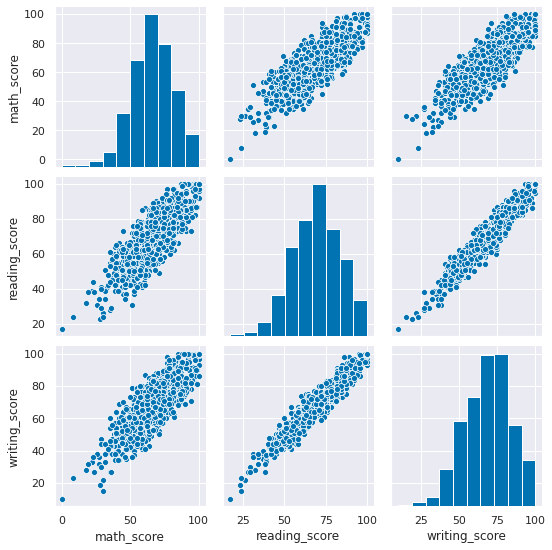

In [0]:
#check distribution & trend of test scores. Anything that stands out?
sns.pairplot(df)
plt.show()

<b>• There are obviously positive correlation between each test score.</b>

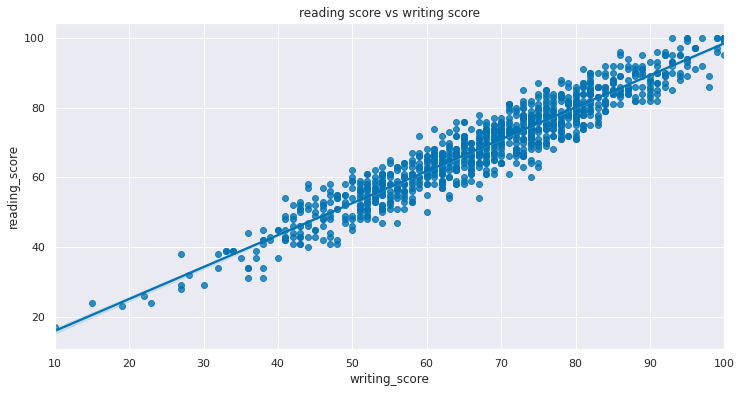

In [0]:
#take a closer look
fig, ax = plt.subplots(figsize=(12,6))
ax = sns.regplot(df.writing_score, df.reading_score)
ax.set_title('reading score vs writing score')
plt.show()

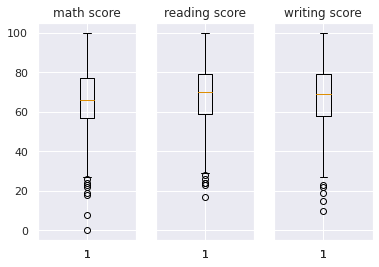

In [0]:
#take a closer look at the score distribution
#show multiple plots
fig, axes = plt.subplots(1, 3, sharex=True, sharey=True)
axes[0].boxplot(df.math_score)
axes[0].set_title('math score')
axes[1].boxplot(df.reading_score)
axes[1].set_title('reading score')

axes[2].boxplot(df.writing_score)
axes[2].set_title('writing score')

plt.show()

**- Each score distribution overall looks the same, except there more outliers in math test.**

<b>- Let's see which test score contributes the most/least to the avg of three tests.</b>

In [0]:
#Make a new column with the avg of three scores
df['average_of_three_tests'] = df[['math_score', 'reading_score', 'writing_score']].mean(axis=1).round(0).astype('int8')

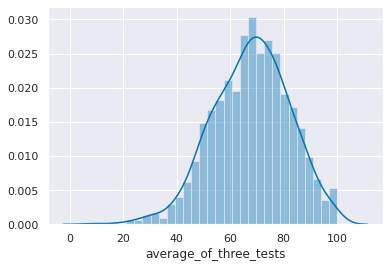

In [0]:
#check its distribution
sns.distplot(df.average_of_three_tests, bins=30)
plt.show()

### • Some correlation analysis

In [0]:
df.corr()

,math_score,reading_score,writing_score,average_of_three_tests
math_score,1.000000,0.817580,0.802642,0.918442
reading_score,0.817580,1.000000,0.954598,0.970143
writing_score,0.802642,0.954598,1.000000,0.965643
average_of_three_tests,0.918442,0.970143,0.965643,1.000000


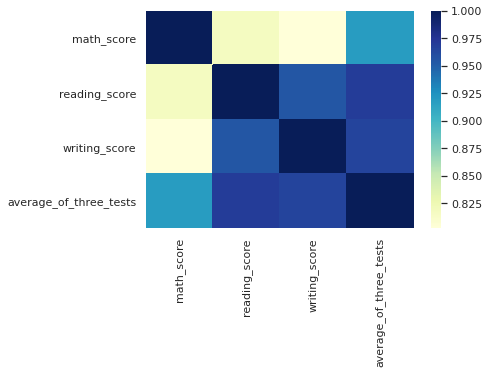

In [0]:
#Heatmap to clearly show the correlation values between variables
sns.heatmap(df.corr(), cmap="YlGnBu")

<b>- Every score has at least the value of 0.8 to each other, which shows the strong correlation relationship between variables. </b><br><br>
<b>- Math score seems to be a less important factor to the avg of three tests compared to reading and writing score.</b>

Next, let's see how categorical data impact the avg of three scores.

In [0]:
#Review, there are five categorical variables
df.select_dtypes(include='category').describe().T

,count,unique,top,freq
gender,1000,2,female,518
race_ethnicity,1000,5,group C,319
parental_level_of_education,1000,6,some college,226
lunch,1000,2,standard,645
test_preparation_course,1000,2,none,642


In [0]:
#For labling on bar chart
def autolabel(viz):
  for p in viz.patches:
    viz.annotate(format(p.get_height(), '.2f'), 
                 (p.get_x() + p.get_width() / 2., p.get_height()), 
                 ha = 'center', 
                 va = 'center', 
                 xytext = (0, 10), 
                 textcoords = 'offset points')
    

In [0]:
def get_sorted_cat_values(num_column, cat_column, ascending=True):
  '''returns a list of sorted values in cat_column sorted by the mean of num_column.
     only accept by str name as in "gender." ''' 
  #----------------------------------------------------------------
  #arguments should be str
  if not (isinstance(num_column, str) and isinstance(cat_column, str)):
    raise ValueError('Enter column by its name in string!')
  #num_column should be numerical
  if not ( df[num_column].dtype.name.__contains__('int') or df[num_column].dtype.name.__contains__('float')):
    raise ValueError(f'First argument should be int or float. Your type was: {df[num_column].dtype.name}')
  #cat_column should be categorical
  if ((df[cat_column].dtype.name) != 'category'):
    raise ValueError(f'Seccond argument should be categorical. Your type was: {df[cat_column].dtype.name}')
  #----------------------------------------------------------------

  sorted_values = ( 
                    df.groupby(cat_column)[num_column]
                   .mean()
                   .sort_values(ascending=ascending)
                   .index
                   .unique()
                  )
  return sorted_values


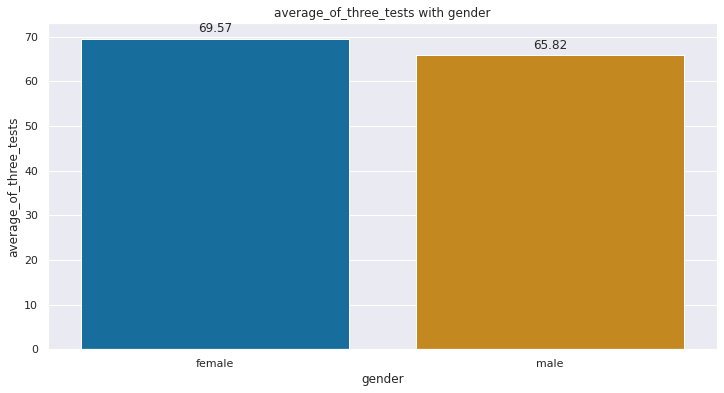

In [0]:
#gender
fig = plt.figure(figsize=(12, 6))
viz = sns.barplot('gender', 'average_of_three_tests', data=df, order=get_sorted_cat_values('average_of_three_tests', 'gender', ascending=False), ci = None)
plt.title('average_of_three_tests with gender')
autolabel(viz)
plt.show()

**- female has slightly higher test scores**

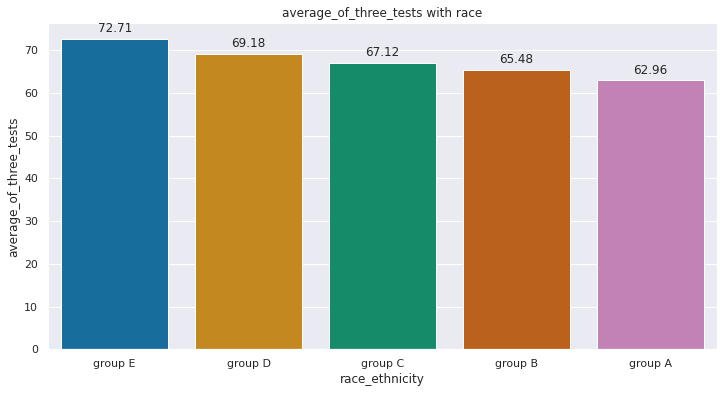

In [0]:
#race
fig = plt.figure(figsize=(12, 6))
viz = sns.barplot('race_ethnicity', 'average_of_three_tests', data=df, order=get_sorted_cat_values('average_of_three_tests', 'race_ethnicity', ascending=False), ci = None)
plt.title('average_of_three_tests with race')
autolabel(viz)
plt.show()

<b>- About 10 points difference between group E and group A. </b>

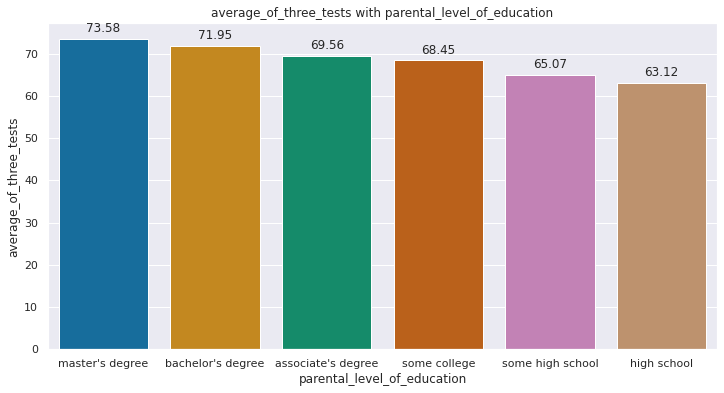

In [0]:
#paret educaiton level
fig = plt.figure(figsize=(12, 6))
viz = sns.barplot(df.parental_level_of_education, df.average_of_three_tests, order=get_sorted_cat_values('average_of_three_tests', 'parental_level_of_education', False), ci = None)
plt.title('average_of_three_tests with parental_level_of_education')
autolabel(viz)
plt.show()

<b>- Looks like parent's education level matters. the higher education student's parent has, the better score that student gets. </b>

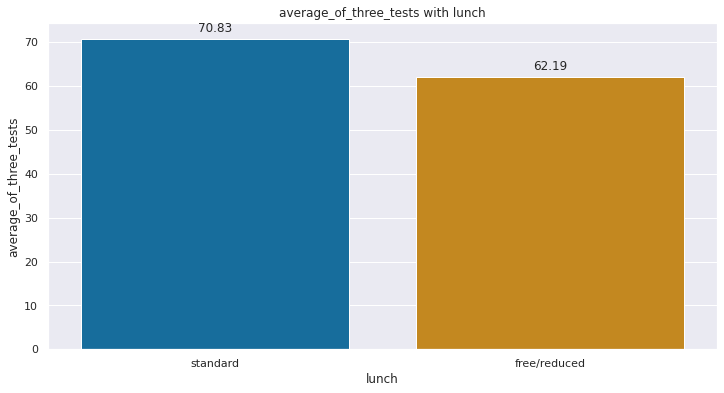

In [0]:
#lunch
fig = plt.figure(figsize=(12, 6))
viz = sns.barplot(df.lunch, df.average_of_three_tests, order=get_sorted_cat_values('average_of_three_tests', 'lunch', False), ci = None)
plt.title('average_of_three_tests with lunch')
autolabel(viz)
plt.show()

**- About 8 points difference**

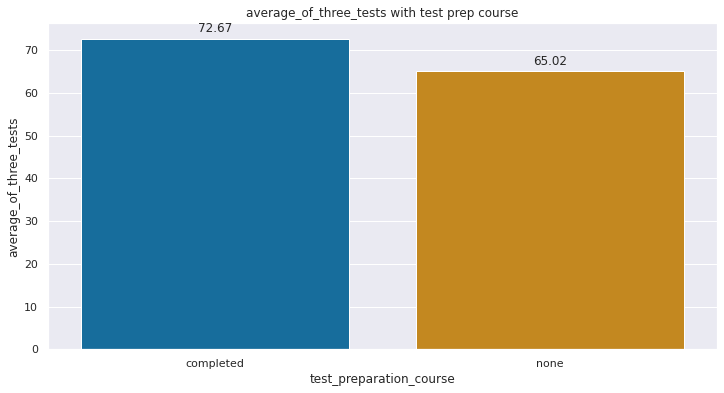

In [0]:
#test prep course
fig = plt.figure(figsize=(12, 6))
viz = sns.barplot(df.test_preparation_course, df.average_of_three_tests, order=get_sorted_cat_values('average_of_three_tests', 'test_preparation_course', False), ci = None)
plt.title('average_of_three_tests with test prep course')
autolabel(viz)
plt.show()

**- Test score is quite different if a student completed the test prep course. This can be considered as one of the best variables when predicting the test scores.**

## <b>Conclusion</b>

###• Results

1. Data contained some categorical values and numerica values ranging from 0-100, so I was able to reduce the memory usage a lot.
<br><br>
2. All of three tests (math, reading, writing) are strongly correlated with the average test scores, but math test was the least impactfull and that it had more extreme outliers than the other two.
<br><br>
3. Race, parent's education, lunch are especially related to students' test scores. Max of around 10 points difference in the avg test scores.
<br><br>
4. Test prep course has some impact, though, we don't yet know how significant its impact is.
<br><br>
5. We still would like to see how a combination of these categorical variables would be related to the test scores.

###• Next steps / New assumptions to test

1. One of the assumptions is that students of a particular race tends to be wealthier/not-wealithier than other race. <br>
That could lead to parents having a higher/lower education, being able/not-able to provide children the standard lunch. 
<br><br>
2. We would like to conduct statistical tests to see if difference/results we saw are statistically significant.
<br><br>
3. As the final step, we'd like to build a predictive model based on variables we will have selected by statistical tests as well as other feature engineering techniques.
